<a href="https://colab.research.google.com/github/nataliapazin/ANN_Trabalho1/blob/main/Trabalho_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:
# bibliotecas usadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.metrics import r2_score 
np.random.seed(0)

In [182]:
# para gerar o grafico no browser
%matplotlib inline

In [183]:
#Função para normatizar os dados entre (0,1) como o artigo em estudo faz
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=min_x
        b=max_x
        x[i]=(x[i]-a)/(b-a)
    return x

In [184]:
#Função para retornar os dados normamtizados para os valores originais
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=min_x
        b=max_x
        x[i]=x[i]*(b-a)+a
    return x

In [185]:
!git clone https://github.com/nataliapazin/ANN_Trabalho1
%cd ANN_Trabalho1

Cloning into 'ANN_Trabalho1'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 45 (delta 17), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (45/45), done.
/content/ANN_Trabalho1/ANN_Trabalho1/ANN_Trabalho1/ANN_Trabalho1/ANN_Trabalho1/ANN_Trabalho1/ANN_Trabalho1/ANN_Trabalho1/ANN_Trabalho1/ANN_Trabalho1/ANN_Trabalho1/ANN_Trabalho1/ANN_Trabalho1/ANN_Trabalho1/ANN_Trabalho1


In [186]:
# leitura dos dados
DAT=pd.read_csv("Extraction_Data.csv",delimiter=";")
print(DAT)

    S.N  X1   X2   X3  X4  Dry Weight
0     1  10  3.0  1.5  25     0.50560
1     2  20  3.0  1.5  25     0.62205
2     3  10  6.0  1.5  25     0.68300
3     4  20  6.0  1.5  25     0.35209
4     5  15  4.5  1.0  15     0.62450
5     6  15  4.5  2.0  15     0.61000
6     7  15  4.5  1.0  35     1.65230
7     8  15  4.5  2.0  35     0.85650
8     9  10  4.5  1.5  15     0.25890
9    10  20  4.5  1.5  15     0.18430
10   11  10  4.5  1.5  35     0.97200
11   12  20  4.5  1.5  35     0.87600
12   13  15  3.0  1.0  25     1.01980
13   14  15  6.0  1.0  25     1.20910
14   15  15  3.0  2.0  25     1.21900
15   16  15  4.5  2.0  25     0.48630
16   17  10  4.5  1.0  25     1.00700
17   18  20  4.5  1.0  25     0.70100
18   19  10  4.5  2.0  25     0.32600
19   20  20  3.0  2.0  25     0.38870
20   21  15  6.0  1.5  15     0.54700
21   22  15  3.0  1.5  15     0.44200
22   23  15  6.0  1.5  35     1.20430
23   24  15  4.5  1.5  35     1.20534
24   25  15  4.5  1.5  25     1.63150
25   26  15 

In [187]:
# Separa as colunas de interesse
Index=[1,2,3,4,5]
Dat_Select=[]
Dat_Select=DAT.iloc[:,Index].copy()
print(Dat_Select)

    X1   X2   X3  X4  Dry Weight
0   10  3.0  1.5  25     0.50560
1   20  3.0  1.5  25     0.62205
2   10  6.0  1.5  25     0.68300
3   20  6.0  1.5  25     0.35209
4   15  4.5  1.0  15     0.62450
5   15  4.5  2.0  15     0.61000
6   15  4.5  1.0  35     1.65230
7   15  4.5  2.0  35     0.85650
8   10  4.5  1.5  15     0.25890
9   20  4.5  1.5  15     0.18430
10  10  4.5  1.5  35     0.97200
11  20  4.5  1.5  35     0.87600
12  15  3.0  1.0  25     1.01980
13  15  6.0  1.0  25     1.20910
14  15  3.0  2.0  25     1.21900
15  15  4.5  2.0  25     0.48630
16  10  4.5  1.0  25     1.00700
17  20  4.5  1.0  25     0.70100
18  10  4.5  2.0  25     0.32600
19  20  3.0  2.0  25     0.38870
20  15  6.0  1.5  15     0.54700
21  15  3.0  1.5  15     0.44200
22  15  6.0  1.5  35     1.20430
23  15  4.5  1.5  35     1.20534
24  15  4.5  1.5  25     1.63150
25  15  4.5  1.5  25     1.62190
26  15  4.5  1.5  25     1.61910


In [188]:
# Separa os dados em normatizados e originais
DAT_OLD=[]
# Guarda os dados antes de serem normatizados, para que não sejam perdidos
DAT_OLD=Dat_Select.copy()
DAT=Normatiza(Dat_Select)
print('================================================================')
print(DAT.head())
print('================================================================')


    X1   X2   X3   X4  Dry Weight
0  0.0  0.0  0.5  0.5    0.218869
1  1.0  0.0  0.5  0.5    0.298195
2  0.0  1.0  0.5  0.5    0.339714
3  1.0  1.0  0.5  0.5    0.114298
4  0.5  0.5  0.0  0.0    0.299864


In [189]:
# separa os dados em treino e teste
train=DAT.sample(frac=0.80, random_state=None) # a fração em 0,8 diz que 80% dos dados serão usados em treino 
test=DAT.drop(train.index) # função drop garante que os dados usados no treino não serão usados em teste
#treino e teste possuem tanto x (variáveis independentes) quanto y (variáveis dependentes)
print("===================================================================")
print(train.head())
print("===================================================================")
print(train.shape[0],'= Número de dados de treino') # mostra o numero de dados utilizados para treino
print("===================================================================")
print(test.head())
print("===================================================================")
print(test.shape[0],'= Número de dados de teste') # mostra o numero de dados utilizados para teste
print("===================================================================")

     X1   X2   X3   X4  Dry Weight
2   0.0  1.0  0.5  0.5    0.339714
24  0.5  0.5  0.5  0.5    0.985831
14  0.5  0.0  1.0  0.5    0.704837
17  1.0  0.5  0.0  0.5    0.351975
5   0.5  0.5  1.0  0.0    0.289986
22 = Número de dados de treino
     X1   X2   X3   X4  Dry Weight
0   0.0  0.0  0.5  0.5    0.218869
3   1.0  1.0  0.5  0.5    0.114298
12  0.5  0.0  0.0  0.5    0.569142
15  0.5  0.5  1.0  0.5    0.205722
21  0.5  0.0  0.5  0.0    0.175545
5 = Número de dados de teste


In [190]:
# Obtém as variáveis independentes (treino e teste)
x_train=train.iloc[:,[0,1,2,3]] # a coluna 4 não entra nessa parte, porque ela é uma coluna de resposta (variável dependente)
x_test=test.iloc[:,[0,1,2,3]]
X_OLD=DAT_OLD.iloc[:,[0,1,2,3]]
print('================================================================')
print(x_test.head())
print('================================================================')
print(x_train.head())
print('================================================================')
print(X_OLD.head())
print('================================================================')

     X1   X2   X3   X4
0   0.0  0.0  0.5  0.5
3   1.0  1.0  0.5  0.5
12  0.5  0.0  0.0  0.5
15  0.5  0.5  1.0  0.5
21  0.5  0.0  0.5  0.0
     X1   X2   X3   X4
2   0.0  1.0  0.5  0.5
24  0.5  0.5  0.5  0.5
14  0.5  0.0  1.0  0.5
17  1.0  0.5  0.0  0.5
5   0.5  0.5  1.0  0.0
   X1   X2   X3  X4
0  10  3.0  1.5  25
1  20  3.0  1.5  25
2  10  6.0  1.5  25
3  20  6.0  1.5  25
4  15  4.5  1.0  15


In [191]:
# Obtem a variável dependente (treino e teste)
Index=[4]
y_train=train.iloc[:,Index] # entra apenas a coluna 4 pois há apenas uma resposta no artigo
y_test=test.iloc[:,Index]
Y_OLD=DAT_OLD.iloc[:,Index]
print('================================================================')
print(y_test.head())
print('================================================================')
print(y_train.head())
print('================================================================')
print(Y_OLD.head())
print('================================================================')

    Dry Weight
0     0.218869
3     0.114298
12    0.569142
15    0.205722
21    0.175545
    Dry Weight
2     0.339714
24    0.985831
14    0.704837
17    0.351975
5     0.289986
   Dry Weight
0     0.50560
1     0.62205
2     0.68300
3     0.35209
4     0.62450


In [192]:
# Define a Rede Neural 
# Função ativação Sigmoide utilizada, pois é mais apropriada para casos de normatização entre 0 e 1
# Número de neurônios = 12, como escolhido pelo autor do artigo
ANN = MLPRegressor(solver='lbfgs',activation='logistic',alpha=0.0001,max_iter=15000,hidden_layer_sizes=(12),random_state=15)

ANN.fit(x_train, y_train.values.ravel()) #Treina a Rede Neural. Aqui a função ravel transforma a matriz em um vetor linha

y_calc_train=ANN.predict(x_train) # Utiliza a Rede para treino

y_calc_test=ANN.predict(x_test) # Utiliza a Rede para teste

# Transforma a resposta em Data Frame
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_test=pd.DataFrame(y_calc_test)
col_names=list(y_train)
y_calc_train.columns = col_names
y_calc_test.columns = col_names

# Transforma os dados normatizados em dados originais
y_calc_train=Original(y_calc_train,Y_OLD)
y_calc_test=Original(y_calc_test,Y_OLD)
test=[]
train=[]
train=Original(y_train,Y_OLD)
test=Original(y_test,Y_OLD)

# Definindo a variável que vai compor o gráfico
result_obs_train=[]
result_calc_train=[]
result_calc_train=y_calc_train['Dry Weight'].copy()
result_obs_train=train['Dry Weight'].copy()
result_obs_test=[]
result_calc_test=[]
result_calc_test=y_calc_test['Dry Weight'].copy()
result_obs_test=test['Dry Weight'].copy()

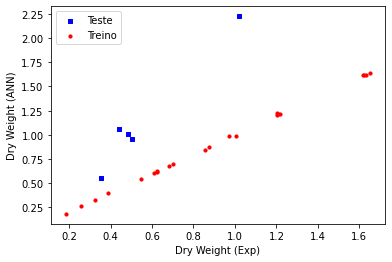

============= TREINO =============
MSE treino= 7.587229286306099e-05
R^2 treino= 0.9996292362978855


============== TESTE ==============
MSE teste= 0.46867920059526513
R^2 teste= -7.461411579281087


In [193]:
# Expressa as respostas em gráfico
fig = plt.figure()
ax1 = fig.add_subplot(111) # Mostra dois graficos sob o mesmo eixo 
ax1.scatter(result_obs_test,result_calc_test, s=10, c='b', marker="s", label='Teste')
ax1.scatter(result_obs_train,result_calc_train, s=10, c='r', marker="o", label='Treino')
plt.legend(loc='upper left')
plt.ylabel('Dry Weight (ANN)')
plt.xlabel('Dry Weight (Exp)')
plt.show()

print('============= TREINO =============')
mse=mean_squared_error(result_obs_train,result_calc_train)
print("MSE treino=",mse)
R2=r2_score(result_obs_train,result_calc_train)
print("R^2 treino=",R2)
print('==================================\n\n')
print('============== TESTE ==============')
mse=mean_squared_error(result_obs_test,result_calc_test)
print("MSE teste=",mse)
R2=r2_score(result_obs_test,result_calc_test)
print("R^2 teste=",R2)
print('===================================')